In [4]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
print('Current Directory: '+os.getcwd())

CSV_path = 'E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04'
CSV_corrected_path = CSV_path + '\corrected'
print(CSV_corrected_path)

Current Directory: C:\Users\abhim\Documents\Jupyter Notebooks\FGDOS Radiation Testing\HollandPTC-12_04
E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\corrected


In [6]:
file_s1 ='FGDOS_03F_HIGH_B3_3_Apr_12_21-29-14_s1.csv'
file_s2 ='FGDOS_03F_HIGH_B3_3_Apr_12_21-29-14_s2.csv'
print(file_s1)
print(file_s2)
df_s1 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s1 ,encoding='ISO-8859-1')
df_s2 = pd.read_csv('E:\SPACEFLIGHT TU DELFT\THESIS\LUNAR ZEBRO\Assembly, Integration and Testing\FGDOS Radiation Testing\Test Data\Data Logging & Processing\HollandPTC-12_04\Arduino_CSV\corrected'+ '\\'+ file_s2 ,encoding='ISO-8859-1')


FGDOS_03F_HIGH_B3_3_Apr_12_21-29-14_s1.csv
FGDOS_03F_HIGH_B3_3_Apr_12_21-29-14_s2.csv


In [9]:
s1 = df_s1.to_numpy()
s2 = df_s2.to_numpy()
df_s1.head()
df_s2.head()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
0,0.0000,2,85,260612,71655,0,7.63,h,0,0
1,232.6543,2,85,260673,71632,0,7.63,h,0,0
2,495.4483,2,85,260581,71655,0,7.63,h,0,0
3,757.4784,2,85,260574,71647,0,7.63,h,0,0
4,1281.7894,2,85,260536,71640,0,7.63,h,0,0


In [10]:
df_s1.tail()
df_s2.tail()

,Time (ms),Sensor,Temperature (° C),Sensor Frequency (Hz),Reference Frequency (Hz),Recharge Register,Window Factor,Sensitivity,Passive,Standby
8377,2.403051e+06,2,86,99281,71540,2,7.63,h,0,0
8378,2.403313e+06,2,86,99273,71533,2,7.63,h,0,0
8379,2.403576e+06,2,86,99357,71540,2,7.63,h,0,0
8380,2.403841e+06,2,86,99365,71525,2,7.63,h,0,0
8381,2.404103e+06,2,86,99281,71525,2,7.63,h,0,0


In [11]:
# TID Baseline test and to see rebound at 120 MeV
energy = 120
dose_rate_air = 0.6  # Gy/min
conv_factor = 0.906   # LET protons in Si / Air @ energy
dose_rate_Si = dose_rate_air * conv_factor

In [12]:
s1[s1[:,3]<90000]

array([[0.0, 1, 87, ..., 'h', 0, 0],
       [245.6266, 1, 87, ..., 'h', 0, 0],
       [507.2992, 1, 87, ..., 'h', 0, 0],
       ...,
       [2403648.5196, 1, 88, ..., 'h', 0, 0],
       [2403915.2631, 1, 88, ..., 'h', 0, 0],
       [2404176.7247, 1, 88, ..., 'h', 0, 0]], dtype=object)

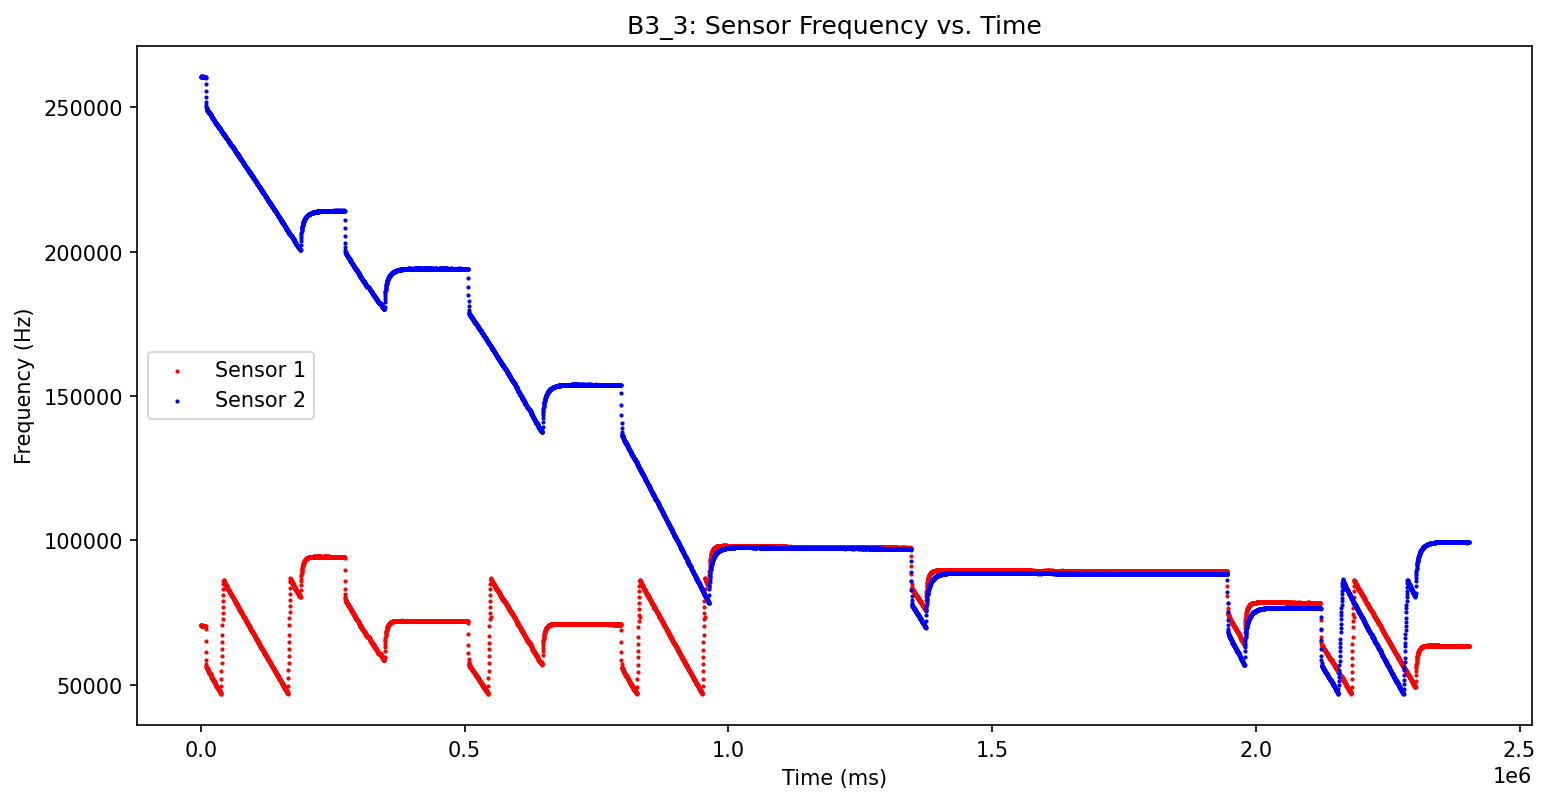

In [38]:
fig_sen_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
#plt.xlim(2.15e6,2.35e6)
#plt.xlim(ll_2,ul_2)
#plt.ylim(0.3e5,1.2e5)
plt.legend(loc="center left")
plt.title("B3_3: Sensor Frequency vs. Time")
plt.show()

In [30]:
# Sensor 1 irradiation intervals
#s1[(s1[:,0]> 6.2e4) & (s1[:,0]< 9e4)]
ll_1 = 0.84e6
ul_1 = 0.95e6
zone_1 = s1[(s1[:,0]> ll_1) & (s1[:,0]< ul_1)]

#ll_2 = 1.35e6
#ul_2 = 1.37e6

ll_2 = 2.19e6
ul_2 = 2.3e6
zone_2 = s1[(s1[:,0]> ll_2) & (s1[:,0]< ul_2)]

In [31]:
# Sensitivity Sensor 1 - Overall
model_s1 = LinearRegression()
t = s1[1:,0].reshape(-1, 1)
s_freq = s1[1:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.014437428638673921
intercept: [75326.13882158]
slope: [[0.00248104]]
Sensor 1 sensitivity in kHz/Gy:  [[0.27384571]]


In [32]:
# Sensitivity Sensor 1 - Zone 1
model_s1 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.9999315925104106
intercept: [360765.11870096]
slope: [[-0.33031108]]
Sensor 1 sensitivity in kHz/Gy:  [[36.45817637]]


In [33]:
# Sensitivity Sensor 1 - Zone 2
model_s1 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s1.fit(t,s_freq)
r_sq = model_s1.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s1.intercept_)
print('slope:', model_s1.coef_)
sensitivity_s1 = abs(model_s1.coef_)/(dose_rate_Si/60)

print('Sensor 1 sensitivity in kHz/Gy: ',sensitivity_s1)

coefficient of determination: 0.999885435552052
intercept: [780392.19774666]
slope: [[-0.31761931]]
Sensor 1 sensitivity in kHz/Gy:  [[35.05731852]]


In [34]:
# Sensor 2 irradiation intervals
ll_1 = 0.8e6
ul_1 = 0.95e6
zone_1 = s2[(s2[:,0]> ll_1) & (s2[:,0]< ul_1)]

#ll_2 = 1.35e6
#ul_2 = 1.37e6

ll_2 = 2.17e6
ul_2 = 2.275e6

zone_2 = s2[(s2[:,0]> ll_2) & (s2[:,0]< ul_2)]

In [35]:
# Sensitivity Sensor 2 - Overall
model_s2 = LinearRegression()
t = s2[1:,0].reshape(-1, 1)
s_freq = s2[1:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.7851015774565699
intercept: [202090.82012135]
slope: [[-0.0664099]]
Sensor 2 sensitivity in kHz/Gy:  [[7.33001095]]


In [36]:
# Sensitivity Sensor 2 - Zone 1
model_s2 = LinearRegression()
t = zone_1[:,0].reshape(-1, 1)
s_freq = zone_1[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)

print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9998543117907511
intercept: [417397.28822313]
slope: [[-0.35168125]]
Sensor 2 sensitivity in kHz/Gy:  [[38.81691484]]


In [37]:
# Sensitivity Sensor 2 - Zone 2
model_s2 = LinearRegression()
t = zone_2[:,0].reshape(-1, 1)
s_freq = zone_2[:,3].reshape(-1, 1)
model_s2.fit(t,s_freq)
r_sq = model_s2.score(t,s_freq)
print('coefficient of determination:', r_sq)
print('intercept:', model_s2.intercept_)
print('slope:', model_s2.coef_)
sensitivity_s2 = abs(model_s2.coef_)/(dose_rate_Si/60)
print('Sensor 2 sensitivity in kHz/Gy: ',sensitivity_s2)

coefficient of determination: 0.9998716593989937
intercept: [819023.19654626]
slope: [[-0.33877747]]
Sensor 2 sensitivity in kHz/Gy:  [[37.39265638]]


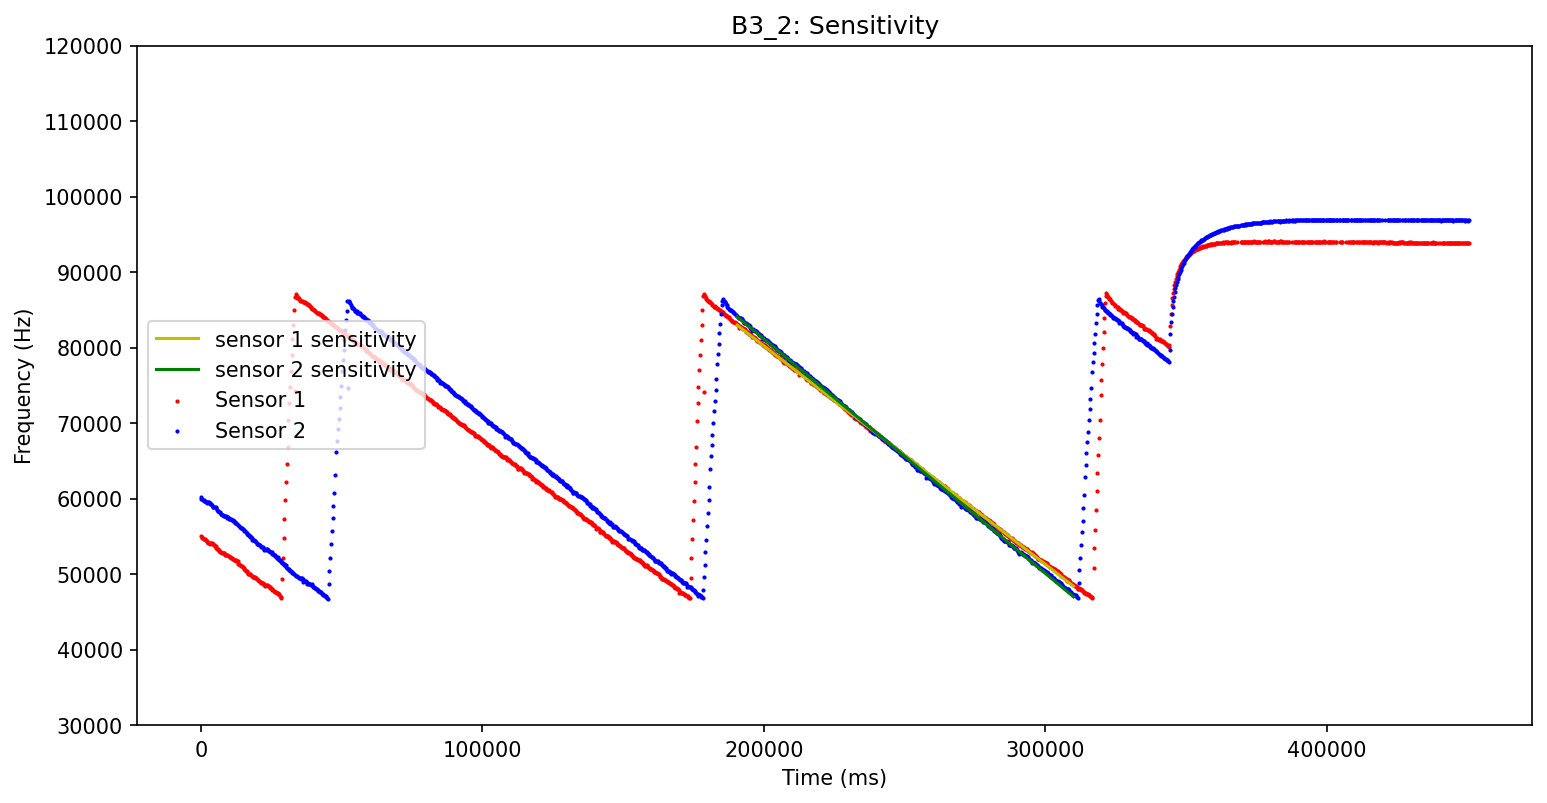

In [37]:
# Plot the linear regression lines
intercept_s1 = model_s1.intercept_
slope_s1 = model_s1.coef_
sensi_s1 = intercept_s1 + t*slope_s1

intercept_s2 = model_s2.intercept_
slope_s2 = model_s2.coef_
sensi_s2 = intercept_s2 + t*slope_s2

fig_sensitivity_freq = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')
plt.plot(t,sensi_s1,'y-',label='sensor 1 sensitivity')
plt.plot(t,sensi_s2,'g-',label='sensor 2 sensitivity')
plt.ylim(0.3e5,1.2e5)

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_2: Sensitivity")
plt.show()

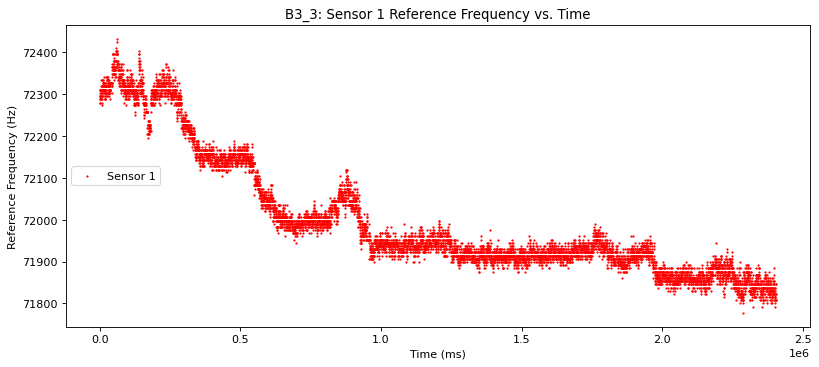

min:  71777
max:  72433
range:  656
mean:  72003.67964472563
standard deviation:  148.13329015318095


In [22]:
fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], s1[:,4],s=1, c='r', label = 'Sensor 1')
#plt.scatter(s2[1:,0], s2[1:,4],s=1,label = 'Sensor 2')
#plt.plot(B4_PRE_TEST[1:,0], B4_PRE_TEST[1:,4],"g-",label = 'Reference frequency')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3: Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',s1[:,4].min())
print('max: ',s1[:,4].max())
print('range: ',s1[:,4].max()-s1[:,4].min())
print('mean: ',s1[:,4].mean())
print('standard deviation: ',s1[:,4].std())

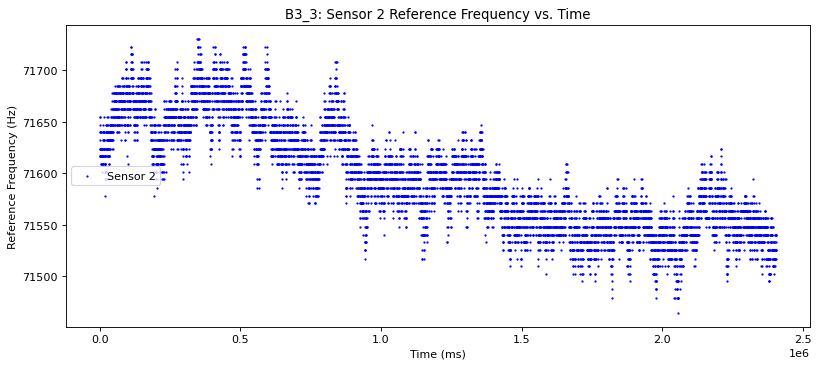

min:  71464
max:  71731
range:  267
mean:  71596.91803865426
sigma:  51.46863476118218


In [15]:
fig_ref_freq_s2 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s2[:,0], s2[:,4],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3: Sensor 2 Reference Frequency vs. Time")
plt.show()

print('min: ',s2[:,4].min())
print('max: ',s2[:,4].max())
print('range: ',s2[:,4].max()-s2[:,4].min())
print('mean: ',s2[:,4].mean())
print('sigma: ',s2[:,4].std())

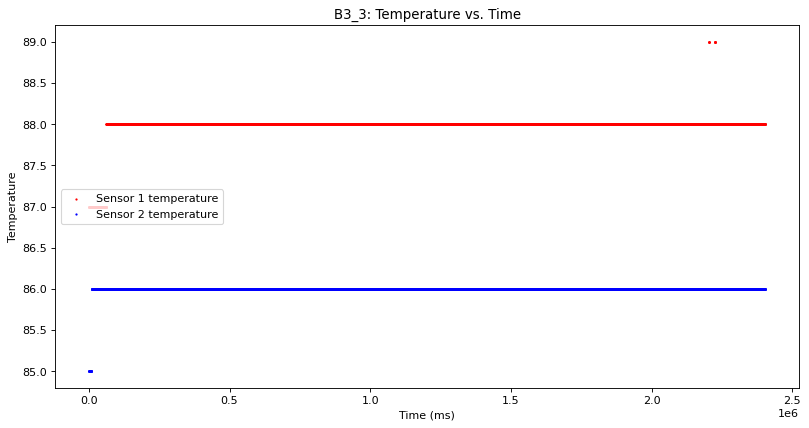

In [16]:
fig_temp = plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(s1[:,0], s1[:,2],s=1,c='r',label = 'Sensor 1 temperature')
plt.scatter(s2[:,0], s2[:,2],s=1,c='b',label = 'Sensor 2 temperature')

plt.xlabel('Time (ms)')
plt.ylabel('Temperature')
plt.legend(loc="center left")
plt.title("B3_3: Temperature vs. Time")
plt.show()

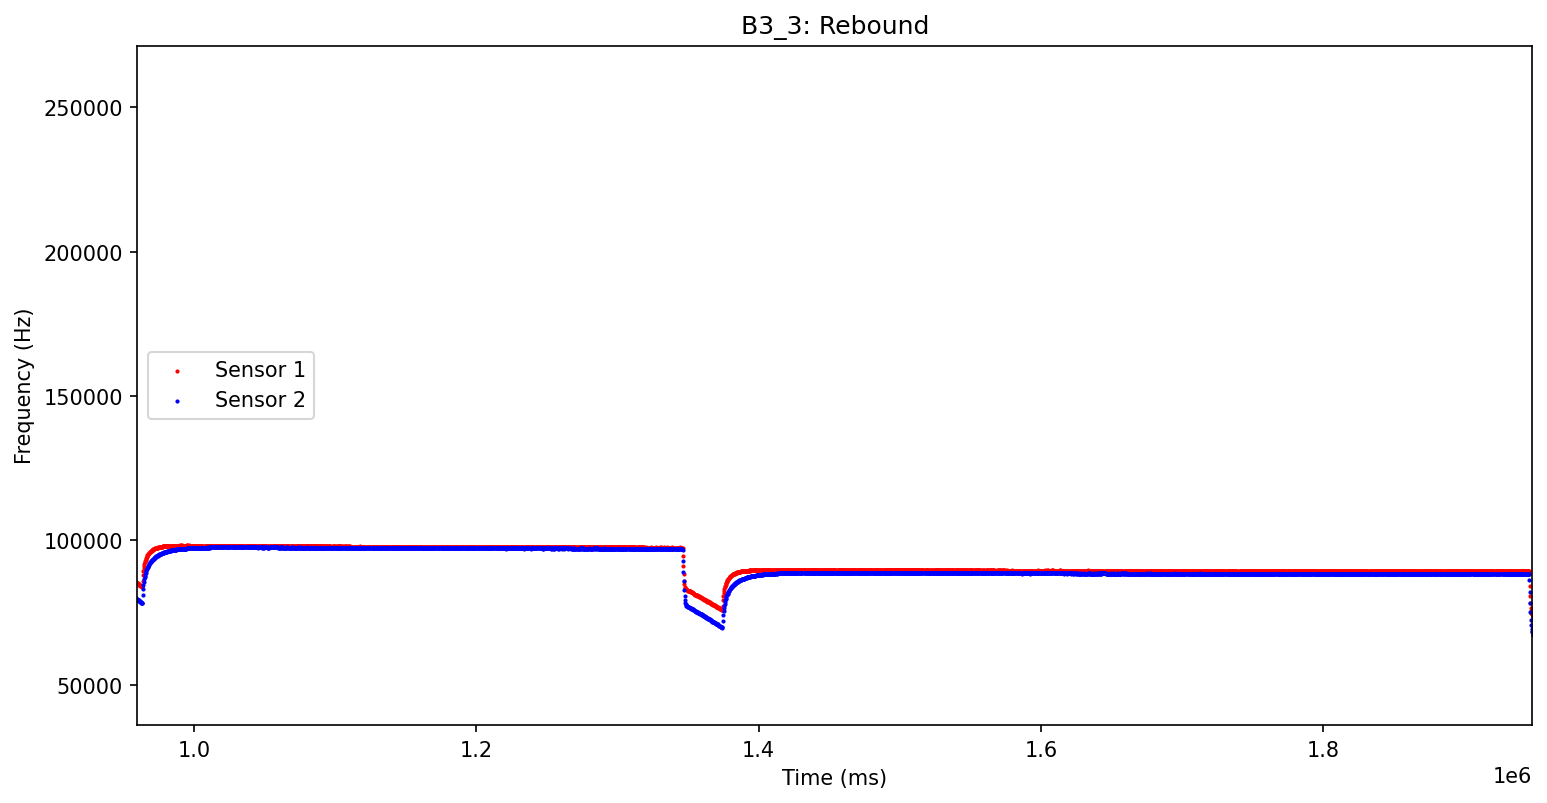

In [66]:
fig_sen_rebound = plt.figure(figsize=(12, 6), dpi=150)
plt.scatter(s1[:,0], s1[:,3],s=1, c='r',label = 'Sensor 1')
plt.scatter(s2[:,0], s2[:,3],s=1, c='b', label = 'Sensor 2')

plt.xlabel('Time (ms)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0.96e6,1.948e6)
#plt.xlim(ll_2,ul_2)
#plt.ylim(0.3e5,1.2e5)
plt.legend(loc="center left")
plt.title("B3_3: Rebound")
plt.show()       

In [63]:
# specify time zones for capturing rebound effect

# reb_1_t1 = 0.96e6
# reb_1_t2 = 1.0e6
# reb_1_t3 = 1.33e6
# reb_1_t4 = 1.349e6

reb_1_t1 = 1.35e6
reb_1_t2 = 1.45e6
reb_1_t3 = 1.9e6
reb_1_t4 = 1.948e6

In [64]:
# SENSOR 1 Rebound 

# drop values during recharging
s1_rebound = s1[s1[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s1_rebound_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t1) & (s1_rebound[:,0]<= reb_1_t3)] 
s1_level_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t3)]
s1_drop_1 = s1_rebound[(s1_rebound[:,0] >= reb_1_t2) & (s1_rebound[:,0]<= reb_1_t4)]

rebound_1 = s1_level_1[:,3].mean() - s1_rebound_1[:,3].min()
drop_1 = s1_level_1[:,3].mean() - s1_drop_1[:,3].min()


print("Rebound starts at: ",s1_rebound_1[:,3].min())
print("Rebound levels off at: ",s1_level_1[:,3].mean())
print("Rebound drops off to: ",s1_drop_1[:,3].min())
print("Rebound: ",rebound_1)
print("Drop Off: ",drop_1)

Rebound starts at:  75897
Rebound levels off at:  89450.36476256022
Rebound drops off to:  74340
Rebound:  13553.364762560217
Drop Off:  15110.364762560217


In [65]:
# SENSOR 2 Rebound 

# drop values during recharging
s2_rebound = s2[s2[:,5]<50] # recharge count column has values of around 128 while recharge is ongoing

s2_rebound_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t1) & (s2_rebound[:,0]<= reb_1_t3)] 
s2_level_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t3)]
s2_drop_1 = s2_rebound[(s2_rebound[:,0] >= reb_1_t2) & (s2_rebound[:,0]<= reb_1_t4)]

rebound_1 = s2_level_1[:,3].mean() - s2_rebound_1[:,3].min()
drop_1 = s2_level_1[:,3].mean() - s2_drop_1[:,3].min()


print("Rebound starts at: ",s2_rebound_1[:,3].min())
print("Rebound levels off at: ",s2_level_1[:,3].mean())
print("Rebound drops off to: ",s2_drop_1[:,3].min())
print("Rebound: ",rebound_1)
print("Drop Off: ",drop_1)

Rebound starts at:  69740
Rebound levels off at:  88490.34592043156
Rebound drops off to:  68290
Rebound:  18750.34592043156
Drop Off:  20200.34592043156


[72306 72306 72306 ... 71828 71828 71829]


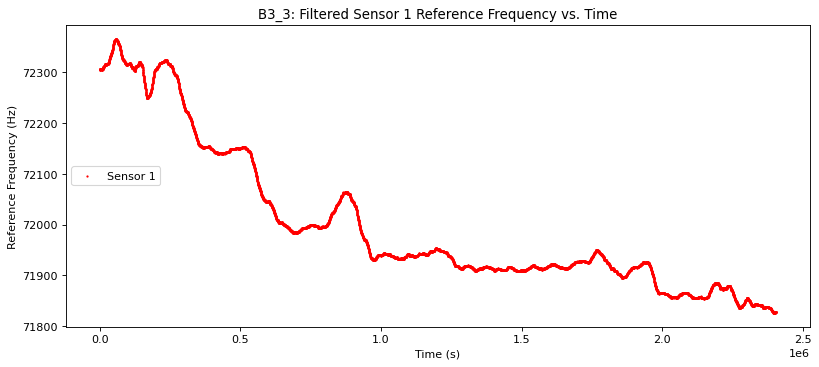

min:  71826
max:  72366
range:  540
mean:  72003.21778805208
sigma:  147.09387933990004


In [21]:
# Filtering of sensor & Reference frequencies
#Moving average filter with N point average

from scipy.ndimage.filters import uniform_filter1d

# Number of points used for averaging
N=100
y = uniform_filter1d(s1[:,4].astype(int), size=N)
print(y)

fig_ref_freq_s1 = plt.figure(figsize=(12, 5), dpi=80)
plt.scatter(s1[:,0], y,s=1, c='r', label = 'Sensor 1')

plt.xlabel('Time (s)')
plt.ylabel('Reference Frequency (Hz)')
plt.legend(loc="center left")
plt.title("B3_3: Filtered Sensor 1 Reference Frequency vs. Time")
plt.show()
print('min: ',y.min())
print('max: ',y.max())
print('range: ',y.max()-y.min())
print('mean: ',y.mean())
print('sigma: ',y.std())